<a href="https://colab.research.google.com/github/b23ci1024/12345678.github.io/blob/main/Copy_of_Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

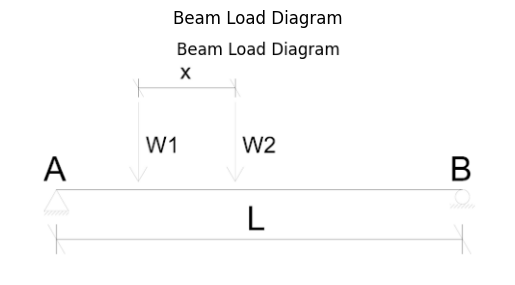

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img_path = '/mnt/data/project.png'
img = Image.open('/content/project.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Beam Load Diagram")
plt.show()



In [2]:

# analyze_ss_movingload.py

import numpy as np

def analyze_beam(L, W1, W2, x_dist):
    """
    Analyzes a simply supported beam subjected to two moving point loads.

    Parameters:
    - L (float): Beam length in meters
    - W1 (float): First moving load in kN
    - W2 (float): Second moving load in kN
    - x_dist (float): Distance between W1 and W2 in meters

    Returns:
    Dictionary with:
        - Maximum Reaction at A and B
        - Bending Moment at W1 = 0
        - Shear Force at midspan (L/2)
        - Maximum Shear Force and Bending Moment with values
    """
    step = 0.01  # Resolution for moving load
    positions = np.arange(0, L - x_dist + step, step)
    mid = L / 2  # Midpoint of beam

    # Arrays to store values at each load position
    RA_list, RB_list, BM_list, SF_list = [], [], [], []

    for pos in positions:
        a1 = pos
        a2 = pos + x_dist

        # Calculate reactions using statics
        RA = (W1 * (L - a1) + W2 * (L - a2)) / L
        RB = (W1 * a1 + W2 * a2) / L

        # Bending Moment at midspan
        BM = RA * mid
        if a1 < mid:
            BM -= W1 * (mid - a1)
        if a2 < mid:
            BM -= W2 * (mid - a2)

        # Shear Force at midspan
        SF = RA
        if a1 < mid:
            SF -= W1
        if a2 < mid:
            SF -= W2

        # Store values
        RA_list.append(RA)
        RB_list.append(RB)
        BM_list.append(BM)
        SF_list.append(SF)

    # Maximum Reactions
    max_RA = max(RA_list)
    max_RB = max(RB_list)

    # Bending Moment when W1 is at 0
    a1 = 0
    a2 = x_dist
    RA_01 = (W1 * (L - a1) + W2 * (L - a2)) / L
    BM_01 = 0  # W1 is at 0 → no moment at that point

    # Shear Force at midspan (L/2) with W1 and W2 on either side
    a1 = mid - x_dist / 2
    a2 = mid + x_dist / 2
    RA_mid = (W1 * (L - a1) + W2 * (L - a2)) / L
    SF_01 = RA_mid
    if a1 < mid:
        SF_01 -= W1
    if a2 < mid:
        SF_01 -= W2

    # Maximum shear force and bending moment
    SF_max = max(SF_list)
    BM_max = max(BM_list)

    return {
        "Maximum Reaction at A (kN)": round(max_RA, 2),
        "Maximum Reaction at B (kN)": round(max_RB, 2),
        "Bending Moment BM_01 (kNm)": round(BM_01, 2),
        "Shear Force SF_01 (kN)": round(SF_01, 2),
        "Maximum Shear Force SF_max (kN)": round(SF_max, 2),
        "Maximum Bending Moment BM_max (kNm)": round(BM_max, 2)
    }


if __name__ == "__main__":  #Corrected indentation
    print("Simply Supported Beam - Moving Load Analysis")

    # Take user input
    L = float(input("Enter beam length (m): "))
    W1 = float(input("Enter load W1 (kN): "))
    W2 = float(input("Enter load W2 (kN): "))
    x = float(input("Enter distance between W1 and W2 (m): "))

    # Perform analysis
    results = analyze_beam(L, W1, W2, x)

    # Display output
    print("\n----- Output -----")
    print(f"Maximum Reaction at A: {results['Maximum Reaction at A (kN)']} kN")
    print(f"Maximum Reaction at B: {results['Maximum Reaction at B (kN)']} kN")
    print(f"Bending Moment BM_01: {results['Bending Moment BM_01 (kNm)']} kNm")
    print(f"Shear Force SF_01: {results['Shear Force SF_01 (kN)']} kN")
    print(f"Maximum Shear Force SF_max: {results['Maximum Shear Force SF_max (kN)']} kN")
    print(f"Maximum Bending Moment BM_max: {results['Maximum Bending Moment BM_max (kNm)']} kNm")

Simply Supported Beam - Moving Load Analysis
Enter beam length (m): 10
Enter load W1 (kN): 3
Enter load W2 (kN): 5
Enter distance between W1 and W2 (m): 4

----- Output -----
Maximum Reaction at A: 6.0 kN
Maximum Reaction at B: 6.8 kN
Bending Moment BM_01: 0 kNm
Shear Force SF_01: 0.6 kN
Maximum Shear Force SF_max: 2.2 kN
Maximum Bending Moment BM_max: 14.0 kNm
